# Calculating CpG ratio for the *Stylophora pistillata* transcriptome

This workflow calculates CpG ratio, or CpG O/E, for contigs in the *Stylophora pistillata* [transcriptome](http://data.centrescientifique.mc/Data/454Isotigs.fas.zip). CpG ratio is an estimate of germline DNA methylation.

This workflow is an extension of another IPython notebook workflow, `Spist_blast_anno.ipynb`, that generates an annotation of the same transcriptome. This workflow assumes that you have created the directories and files specified in the annotation workflow.

In [1]:
cd ../data/Spist

/Users/jd/Documents/Projects/Coral-CpG-ratio-MS/data/Spist


In [2]:
#fasta file
!head -2 Spist.fasta
!echo 
!echo number of seqs =
!fgrep -c ">" Spist.fasta

>Spi_contig00032  gene=isogroup00001  length=1566
GgATCCATCGAAAGAAAAaGTCGTAGTTGACAGTGATTGCATGACTTCTGTACAACGTCCGATTAGTTTTtGCGTTTTATTGTCTtCTTTTGTACTGgAAATTCGACTCTAGCAAGTTGATTTCGTTTAGTTATGTCTGGCATTGCTTTGGGCAGATTATCAGAAGAGAGAAAAGCTTGGCGTAAAGACcATCCTTTCGGATTTGTGGCCAAACCGGTTAAAAATCCTGATGGTACTCTAAATCTGATGAACTGGGAATGTGCGATCCCaGGAAAGAAAGCGACCCCATGGGAAGGAGGCTCTTTCAAATTGAAGATGATATTTAAAGACGACTATCCATCCTCTCCGCCAAAATGTAAATTTGATCCTCCAATTTTCCATCCTAATGTATACCCATCTGGCACAGTGTGTCTGTCTCTTCTAGATGAAGAGAAAGACTGGAGACCTGCCGTCACTATAAAACAGATTTTATTGGGAATTCAAGACTTACTGAaTGATCCAAaCaTAaGaGATCCAGCTCAAGCAGAAGCATACaCCATTTACTGCCAAAACAGATCAGAATATGAGAAACGAGTCAGAAGTCAAGCTGCAAaGTTCTCAAGTTCATAGTGAATAAAGAAAAATATAAAATACTTCGCTAGCAGACGTGTAGGTTAACaGTGACTGGCAGAAATTGGATTTATTTTTtCTCcGTTtGTAAacAaCAaTGTGGAGTGGAGCAaGAATTCATCCgTAACTGCGTTAATACCACAGCTGTTGTTGTGAATTGGAaGGACAATCATGTCTGTTATTTtAGGAAGTTTCACAATGTACAGTTCAACTAACTTATACTAAAAAaCAGCTAAAGTtCACCTTAGTCTATGTtAGTTTtGTTAAAGCTTCTCTGTAgAAGGTTTGGGAGGgTtGTAATGGCTGTAACTATTCAGGgAGATCTGTCAAAGTACACTCTC

In [1]:
#Just printing first line w/out comments and looking at contig names
!awk '{print $1}' Spist.fasta > Spist2.fasta
!head -10 Spist2.fasta
!tail -10 Spist2.fasta

awk: cannot open Spist.fasta (No such file or directory)


In [4]:
#Converting FASTA to tabular format and placing output file in analyses directory
!perl -e '$count=0; $len=0; while(<>) {s/\r?\n//; s/\t/ /g; if (s/^>//) { if ($. != 1) {print "\n"} s/ |$/\t/; $count++; $_ .= "\t";} else {s/ //g; $len += length($_)} print $_;} print "\n"; warn "\nConverted $count FASTA records in $. lines to tabular format\nTotal sequence length: $len\n\n";' \
Spist2.fasta > ../../analyses/Spist/fasta2tab


Converted 15052 FASTA records in 30104 lines to tabular format
Total sequence length: 16227896



In [3]:
cd ../../analyses/Spist

/home/jay/Documents/fish546-2015/Analyses/Spist


In [4]:
#Checking header on new tabular format file
!head -2 fasta2tab

Spi_contig00032		GgATCCATCGAAAGAAAAaGTCGTAGTTGACAGTGATTGCATGACTTCTGTACAACGTCCGATTAGTTTTtGCGTTTTATTGTCTtCTTTTGTACTGgAAATTCGACTCTAGCAAGTTGATTTCGTTTAGTTATGTCTGGCATTGCTTTGGGCAGATTATCAGAAGAGAGAAAAGCTTGGCGTAAAGACcATCCTTTCGGATTTGTGGCCAAACCGGTTAAAAATCCTGATGGTACTCTAAATCTGATGAACTGGGAATGTGCGATCCCaGGAAAGAAAGCGACCCCATGGGAAGGAGGCTCTTTCAAATTGAAGATGATATTTAAAGACGACTATCCATCCTCTCCGCCAAAATGTAAATTTGATCCTCCAATTTTCCATCCTAATGTATACCCATCTGGCACAGTGTGTCTGTCTCTTCTAGATGAAGAGAAAGACTGGAGACCTGCCGTCACTATAAAACAGATTTTATTGGGAATTCAAGACTTACTGAaTGATCCAAaCaTAaGaGATCCAGCTCAAGCAGAAGCATACaCCATTTACTGCCAAAACAGATCAGAATATGAGAAACGAGTCAGAAGTCAAGCTGCAAaGTTCTCAAGTTCATAGTGAATAAAGAAAAATATAAAATACTTCGCTAGCAGACGTGTAGGTTAACaGTGACTGGCAGAAATTGGATTTATTTTTtCTCcGTTtGTAAacAaCAaTGTGGAGTGGAGCAaGAATTCATCCgTAACTGCGTTAATACCACAGCTGTTGTTGTGAATTGGAaGGACAATCATGTCTGTTATTTtAGGAAGTTTCACAATGTACAGTTCAACTAACTTATACTAAAAAaCAGCTAAAGTtCACCTTAGTCTATGTtAGTTTtGTTAAAGCTTCTCTGTAgAAGGTTTGGGAGGgTtGTAATGGCTGTAACTATTCAGGgAGATCTGTCAAAGTACACTCTCTAATCCCATTGTTTCTTAAGGAATGAGTCATTA

In [5]:
#Add column with length of sequence
!perl -e '$col = 2;' -e 'while (<>) { s/\r?\n//; @F = split /\t/, $_; $len = length($F[$col]); print "$_\t$len\n" } warn "\nAdded column with length of column $col for $. lines.\n\n";' \
fasta2tab > tab_1


Added column with length of column 2 for 15052 lines.



In [6]:
!wc tab_1

   15052    45156 16565757 tab_1


In [7]:
#The file used to count Cs and Gs will only include the sequence
!awk '{print $2}' tab_1 > tab_2

In [8]:
#This counts CGs - both cases
!echo "CG" | awk -F\[Cc][Gg] '{print NF-1}' tab_2 > CG 

In [9]:
#Counts Cs
!echo "C" | awk -F\[Cc] '{print NF-1}' tab_2 > C 

In [10]:
#Counts Gs
!echo "G" | awk -F\[Gg] '{print NF-1}' tab_2 > G 

In [11]:
#Combining counts
!paste tab_1 \
CG \
C \
G \
> comb
!head -1 comb

Spi_contig00032		GgATCCATCGAAAGAAAAaGTCGTAGTTGACAGTGATTGCATGACTTCTGTACAACGTCCGATTAGTTTTtGCGTTTTATTGTCTtCTTTTGTACTGgAAATTCGACTCTAGCAAGTTGATTTCGTTTAGTTATGTCTGGCATTGCTTTGGGCAGATTATCAGAAGAGAGAAAAGCTTGGCGTAAAGACcATCCTTTCGGATTTGTGGCCAAACCGGTTAAAAATCCTGATGGTACTCTAAATCTGATGAACTGGGAATGTGCGATCCCaGGAAAGAAAGCGACCCCATGGGAAGGAGGCTCTTTCAAATTGAAGATGATATTTAAAGACGACTATCCATCCTCTCCGCCAAAATGTAAATTTGATCCTCCAATTTTCCATCCTAATGTATACCCATCTGGCACAGTGTGTCTGTCTCTTCTAGATGAAGAGAAAGACTGGAGACCTGCCGTCACTATAAAACAGATTTTATTGGGAATTCAAGACTTACTGAaTGATCCAAaCaTAaGaGATCCAGCTCAAGCAGAAGCATACaCCATTTACTGCCAAAACAGATCAGAATATGAGAAACGAGTCAGAAGTCAAGCTGCAAaGTTCTCAAGTTCATAGTGAATAAAGAAAAATATAAAATACTTCGCTAGCAGACGTGTAGGTTAACaGTGACTGGCAGAAATTGGATTTATTTTTtCTCcGTTtGTAAacAaCAaTGTGGAGTGGAGCAaGAATTCATCCgTAACTGCGTTAATACCACAGCTGTTGTTGTGAATTGGAaGGACAATCATGTCTGTTATTTtAGGAAGTTTCACAATGTACAGTTCAACTAACTTATACTAAAAAaCAGCTAAAGTtCACCTTAGTCTATGTtAGTTTtGTTAAAGCTTCTCTGTAgAAGGTTTGGGAGGgTtGTAATGGCTGTAACTATTCAGGgAGATCTGTCAAAGTACACTCTCTAATCCCATTGTTTCTTAAGGAATGAGTCATTA

# Calculating CpGo/e based on [Gavery and Roberts (2010)](http://www.biomedcentral.com/1471-2164/11/483)

<img src="http://eagle.fish.washington.edu/cnidarian/skitch/BMC_Genomics___Full_text___DNA_methylation_patterns_provide_insight_into_epigenetic_regulation_in_the_Pacific_oyster__Crassostrea_gigas__1A0683A5.png" alt="BMC_Genomics___Full_text___DNA_methylation_patterns_provide_insight_into_epigenetic_regulation_in_the_Pacific_oyster__Crassostrea_gigas__1A0683A5.png"/>

In [12]:
!awk '{print $1, "\t", (($4)/($5*$6))*(($3^2)/($3-1))}' comb > ID_CpG #use ^ instead of ** for exponent


In [49]:
!head ID_CpG
!wc ID_CpG

Spi_contig00032 	 0.484363
Spi_contig00035 	 0.335179
Spi_contig00040 	 0.854266
Spi_contig00044 	 0.867137
Spi_contig00046 	 0.196592
Spi_contig00075 	 0.871739
Spi_contig00091 	 0.937628
Spi_contig00094 	 0.131292
Spi_contig00095 	 0.684932
Spi_contig00098 	 0.584255
 15052  30104 402540 ID_CpG


# Now joining CpG to annotation, but first must sort files.

In [2]:
#Sorting Ahya Uniprot/Swissprot annotation file. This file was the result of work done in another notebook: Ahya_blast_anno.ipynb
!sort Spist_blastx_uniprot_sql.tab | tail -n +2 > Spist_blastx_uniprot_sql.tab.sorted
!head Spist_blastx_uniprot_sql.tab.sorted

Spi_contig00035	sp	P80204	TGFR1_RAT	69.77	258	78	0	2	775	244	501	2e-129	  397
Spi_contig00040	sp	Q35101	COX1_METSE	82.85	449	72	1	605	1936	70	518	0.0	  665
Spi_contig00046	sp	E7EY42	PTSS2_DANRE	56.41	234	101	1	19	720	26	258	6e-91	  281
Spi_contig00075	sp	Q37556	NU1M_METSE	80.16	247	48	1	1719	2456	29	275	3e-104	  333
Spi_contig00094	sp	P00519	ABL1_HUMAN	48.15	54	28	0	2494	2333	443	496	2e-09	65.1
Spi_contig00095	sp	P20693	FCER2_MOUSE	28.57	203	122	5	831	229	128	309	6e-18	87.0
Spi_contig00834	sp	P19615	MYP_STRPU	32.94	598	321	18	50	1741	132	683	2e-84	  294
Spi_contig04187	sp	Q9CYA0	CREL2_MOUSE	43.57	140	77	2	82	501	193	330	1e-27	  110
Spi_isotig00002	sp	Q5I2B1	ACTPG_OULOR	56.49	131	56	1	1429	1037	7	136	6e-41	  151
Spi_isotig00005	sp	C9EIC7	ACTP1_URTCR	51.67	120	57	1	1444	1085	54	172	2e-31	  126


In [3]:
#Sorting GOSlim annotation file. This file was the result of work done in another notebook: Spist_blast_anno.ipynb
!sort Spist_GOSlim.tab | tail -n +2 > Spist_GOSlim.sorted
!head Spist_GOSlim.sorted

sort: open failed: Spist_GOSlim.tab: No such file or directory


In [17]:
#Sorting CpG file
!sort ID_CpG > ID_CpG.sorted
!head ID_CpG.sorted

Spi_contig00032 	 0.484363
Spi_contig00035 	 0.335179
Spi_contig00040 	 0.854266
Spi_contig00044 	 0.867137
Spi_contig00046 	 0.196592
Spi_contig00075 	 0.871739
Spi_contig00091 	 0.937628
Spi_contig00094 	 0.131292
Spi_contig00095 	 0.684932
Spi_contig00098 	 0.584255


# For this analysis, *Symbiodinium* sequences were removed. Using file generated from Spist_zoox_removal.ipynb, ID_CpG.sorted2

In [3]:
!join ID_CpG.sorted2 Spist_blastx_uniprot_sql.tab.sorted | awk '{print $1, "\t", $2}' > Spist_cpg_anno

In [5]:
!head Spist_cpg_anno
!wc Spist_cpg_anno

Spi_contig00035 	 0.335179
Spi_contig00040 	 0.854266
Spi_contig00046 	 0.196592
Spi_contig00075 	 0.871739
Spi_contig00094 	 0.131292
Spi_contig00095 	 0.684932
Spi_contig00834 	 0.654594
Spi_contig04187 	 0.876088
Spi_isotig00002 	 0.910243
Spi_isotig00005 	 0.900018
    7061   14122  189272 Spist_cpg_anno


In [4]:
!join ID_CpG.sorted2 Spist_GOSlim.sorted > Spist_cpg_GOslim

In [5]:
!head Spist_cpg_GOslim

Spi_contig00032 0.484363 cell cycle and proliferation
Spi_contig00032 0.484363 cell organization and biogenesis
Spi_contig00032 0.484363 developmental processes
Spi_contig00032 0.484363 other biological processes
Spi_contig00032 0.484363 protein metabolism
Spi_contig00035 0.335179 cell cycle and proliferation
Spi_contig00035 0.335179 cell organization and biogenesis
Spi_contig00035 0.335179 death
Spi_contig00035 0.335179 developmental processes
Spi_contig00035 0.335179 other biological processes


In [6]:
#Putting tabs in between columns
!awk '{print $1, "\t", $2, "\t", $3, $4, $5, $6}' Spist_cpg_GOslim > Spist_cpg_GOslim.tab
!head Spist_cpg_GOslim.tab

Spi_contig00032 	 0.484363 	 cell cycle and proliferation
Spi_contig00032 	 0.484363 	 cell organization and biogenesis
Spi_contig00032 	 0.484363 	 developmental processes  
Spi_contig00032 	 0.484363 	 other biological processes 
Spi_contig00032 	 0.484363 	 protein metabolism  
Spi_contig00035 	 0.335179 	 cell cycle and proliferation
Spi_contig00035 	 0.335179 	 cell organization and biogenesis
Spi_contig00035 	 0.335179 	 death   
Spi_contig00035 	 0.335179 	 developmental processes  
Spi_contig00035 	 0.335179 	 other biological processes 


# Now time to plot data using pandas and matplot

In [7]:
import pandas as pd

In [8]:
jData = pd.read_table('Spist_cpg_GOslim.tab', header=None)
jData

0         1                                  2
0      Spi_contig00032   0.484363       cell cycle and proliferation
1      Spi_contig00032   0.484363   cell organization and biogenesis
2      Spi_contig00032   0.484363          developmental processes  
3      Spi_contig00032   0.484363        other biological processes 
4      Spi_contig00032   0.484363               protein metabolism  
5      Spi_contig00035   0.335179       cell cycle and proliferation
6      Spi_contig00035   0.335179   cell organization and biogenesis
7      Spi_contig00035   0.335179                           death   
8      Spi_contig00035   0.335179          developmental processes  
9      Spi_contig00035   0.335179        other biological processes 
10     Spi_contig00035   0.335179         other metabolic processes 
11     Spi_contig00035   0.335179               protein metabolism  
12     Spi_contig00035   0.335179                   RNA metabolism  
13     Spi_contig00035   0.335179              signal transduction  
14     Spi_contig00035   0.335179                  stress response  
15     Spi_contig00035   0.335179                       transport   
16     Spi_contig00040   0.854266         other metabolic processes 
17     Spi_contig00040   0.854266                       transport   
18     Spi_contig00046   0.196592         other metabolic processes 
19     Spi_contig00075   0.871739         other metabolic processes 
20     Spi_contig00075   0.871739                       transport   
21     Spi_contig00094   0.131292                    cell adhesion  
22     Spi_contig00094   0.131292       cell cycle and proliferation
23     Spi_contig00094   0.131292   cell organization and biogenesis
24     Spi_contig00094   0.131292                           death   
25     Spi_contig00094   0.131292          developmental processes  
26     Spi_contig00094   0.131292                   DNA metabolism  
27     Spi_contig00094   0.131292        other biological processes 
28     Spi_contig00094   0.131292         other metabolic processes 
29     Spi_contig00094   0.131292               protein metabolism  
...                 ...       ...                                ...
13603  Spi_isotig14901   0.815894         other metabolic processes 
13604  Spi_isotig14913   0.841359              signal transduction  
13605  Spi_isotig14926   0.391261               protein metabolism  
13606  Spi_isotig14932   0.626017               protein metabolism  
13607  Spi_isotig14936   0.253558         other metabolic processes 
13608  Spi_isotig14955   0.534380       cell cycle and proliferation
13609  Spi_isotig14955   0.534380   cell organization and biogenesis
13610  Spi_isotig14955   0.534380          developmental processes  
13611  Spi_isotig14956   0.431596               protein metabolism  
13612  Spi_isotig14959   0.958655   cell organization and biogenesis
13613  Spi_isotig14962   0.348816         other metabolic processes 
13614  Spi_isotig14962   0.348816                       transport   
13615  Spi_isotig14966   0.683519               protein metabolism  
13616  Spi_isotig14969   0.480887                   DNA metabolism  
13617  Spi_isotig14969   0.480887               protein metabolism  
13618  Spi_isotig14969   0.480887              signal transduction  
13619  Spi_isotig14969   0.480887                  stress response  
13620  Spi_isotig14970   0.269739   cell organization and biogenesis
13621  Spi_isotig14970   0.269739        other biological processes 
13622  Spi_isotig14970   0.269739         other metabolic processes 
13623  Spi_isotig14970   0.269739                   RNA metabolism  
13624  Spi_isotig14970   0.269739                  stress response  
13625  Spi_isotig14981   0.202625              signal transduction  
13626  Spi_isotig14993   0.663237                           death   
13627  Spi_isotig14993   0.663237        other biological processes 
13628  Spi_isotig14993   0.663237                  stress response  
13629  Spi_isotig149

In [9]:
%matplotlib inline

In [10]:
import matplotlib.pyplot as plt 

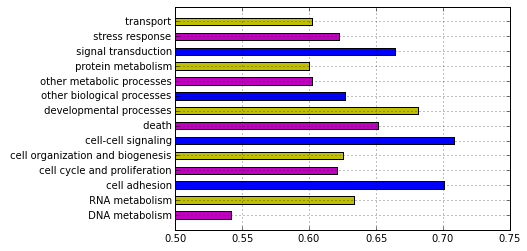

In [11]:
jData.groupby(2)[1].mean().plot(kind='barh', color=list('myb'))
plt.axis([0.5, 0.75, -1, 14])
plt.xlabel('')
plt.ylabel('')
plt.show()

In [13]:
##To plot density curve, must use CpG data WITHOUT annotation. Also must remove "-nan" in order to plot.
!awk '{print $2}' ID_CpG.sorted2 | sed '/-nan/d' > CpG
!head CpG

0.484363
0.335179
0.854266
0.867137
0.196592
0.871739
0.937628
0.131292
0.684932
0.584255


In [14]:
#To plot density curve, must use CpG data with original annotation
CpG = pd.read_table('Spist_cpg_anno', header=None, )
CpG

0
0      0.484363
1      0.335179
2      0.854266
3      0.867137
4      0.196592
5      0.871739
6      0.937628
7      0.131292
8      0.684932
9      0.584255
10     0.857523
11     1.046390
12     0.981477
13     0.654594
14     0.631948
15     0.798651
16     0.876088
17     0.926440
18     0.910725
19     0.910243
20     0.896155
21     0.895683
22     0.900018
23     0.844576
24     0.932216
25     0.987775
26     0.987220
27     0.908013
28     0.972397
29     0.971853
...         ...
14883  0.077346
14884  0.995899
14885  0.805340
14886  0.193988
14887  1.762730
14888  1.116090
14889  0.735748
14890  0.629234
14891  1.161310
14892  0.552857
14893  0.122963
14894  0.717703
14895  0.896540
14896  1.407900
14897  0.808355
14898  0.322698
14899  1.115180
14900  0.466681
14901  0.419544
14902  0.427099
14903  0.843343
14904  0.790032
14905  0.885773
14906  0.000000
14907  1.242950
14908  1.104080
14909  0.430511
14910  0.640071
14911  0.899106
14912  0.506757

[14913 rows x 1 columns]

[-0.3, 1.7, 0, 1.7]

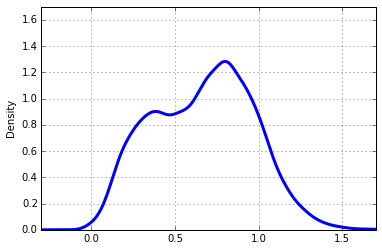

In [15]:
# pandas density plot
CpG[0].plot(kind='kde', linewidth=3);
plt.axis([-0.3, 1.7, 0, 1.7])